In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv(r'E:\INCEPTEZ\Training\Basics_python\HR _analytics _logistic_Regression\train_LZdllcl.csv')

In [3]:
test = pd.read_csv(r'E:\INCEPTEZ\Training\Basics_python\HR _analytics _logistic_Regression\test_2umaH9m.csv')

In [4]:
submission =  pd.read_csv(r'E:\INCEPTEZ\Training\Basics_python\HR _analytics _logistic_Regression\sample_submission_M0L0uXE.csv')

In [5]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
train.info

<bound method DataFrame.info of        employee_id         department     region         education gender  \
0            65438  Sales & Marketing   region_7  Master's & above      f   
1            65141         Operations  region_22        Bachelor's      m   
2             7513  Sales & Marketing  region_19        Bachelor's      m   
3             2542  Sales & Marketing  region_23        Bachelor's      m   
4            48945         Technology  region_26        Bachelor's      m   
...            ...                ...        ...               ...    ...   
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9               NaN      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings 

In [7]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [8]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [9]:
train.shape

(54808, 14)

In [10]:
train.select_dtypes(include='object')

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other
...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing
54804,Operations,region_27,Master's & above,f,other
54805,Analytics,region_1,Bachelor's,m,other
54806,Sales & Marketing,region_9,NaN,m,sourcing


In [11]:
train.select_dtypes(exclude='object')

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...
54803,3030,1,48,3.0,17,0,0,78,0
54804,74592,1,37,2.0,6,0,0,56,0
54805,13918,1,27,5.0,3,1,0,79,0
54806,13614,1,29,1.0,2,0,0,45,0


In [12]:
train['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [13]:
train['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [14]:
train['department'].nunique()

9

In [15]:
test.shape

(23490, 13)

In [16]:
len(train.columns)-len(test.columns)

1

### how to find diff between train and test

In [17]:
train.columns.difference(test.columns)

Index(['is_promoted'], dtype='object')

In [18]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [19]:
train.duplicated().sum()

0

In [20]:
train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

### to include the null values

In [21]:
train['education'].value_counts(dropna=False)

Bachelor's          36669
Master's & above    14925
NaN                  2409
Below Secondary       805
Name: education, dtype: int64

In [22]:
train['education'].value_counts(dropna=False, normalize = True)*100

Bachelor's          66.904467
Master's & above    27.231426
NaN                  4.395344
Below Secondary      1.468764
Name: education, dtype: float64

In [23]:
train['previous_year_rating'].value_counts(dropna=False, normalize = True)*100

3.0    33.969494
5.0    21.422055
4.0    18.021092
1.0    11.354182
2.0     7.708729
NaN     7.524449
Name: previous_year_rating, dtype: float64

In [24]:
test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [25]:
test[test['education'].isna()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
49,3720,Sales & Marketing,region_2,NaN,m,sourcing,1,36,5.0,4,1,0,49
67,26977,Operations,region_2,NaN,m,sourcing,1,28,3.0,3,0,0,59
89,2347,Analytics,region_15,NaN,m,other,2,37,5.0,8,1,0,82
127,42719,Analytics,region_21,NaN,m,sourcing,1,27,NaN,1,0,0,80
138,2721,Analytics,region_22,NaN,f,sourcing,2,26,5.0,3,1,0,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23415,14036,Sales & Marketing,region_7,NaN,m,other,6,26,3.0,3,0,0,48
23424,5890,Analytics,region_15,NaN,m,sourcing,1,34,3.0,5,0,0,87
23452,65429,Analytics,region_15,NaN,m,sourcing,1,30,2.0,7,0,0,83
23459,30477,Sales & Marketing,region_22,NaN,m,other,1,31,2.0,7,0,0,52


In [26]:
test[test['education'].isna()==False]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [27]:
test[test['education'].notna()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [28]:
data = pd.concat([train,test], ignore_index=True)


In [29]:
train.shape , test.shape , data.shape

((54808, 14), (23490, 13), (78298, 14))

In [30]:
data['is_promoted'].isna().sum()

23490

In [31]:
data['is_promoted'].notna().sum()

54808

### fill the education

In [32]:
data['education'].fillna('unknown', inplace =True)

In [33]:
data['education'].value_counts(dropna=False, normalize = True)*100

Bachelor's          66.728397
Master's & above    27.368515
unknown              4.397303
Below Secondary      1.505786
Name: education, dtype: float64

In [34]:
data['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [35]:
data[data['previous_year_rating'].isna()]['length_of_service']

10       1
23       1
29       1
56       1
58       1
        ..
78214    1
78244    1
78253    1
78287    1
78296    1
Name: length_of_service, Length: 5936, dtype: int64

In [36]:
data[data['previous_year_rating'].isna()]['length_of_service'].unique()

array([1], dtype=int64)

In [37]:
data['previous_year_rating'].fillna(0, inplace=True)

In [38]:
data.isna().sum()

employee_id                 0
department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [39]:
data.select_dtypes(include='object')

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other
...,...,...,...,...,...
78293,Legal,region_2,Below Secondary,m,sourcing
78294,Technology,region_25,Bachelor's,m,sourcing
78295,HR,region_16,Bachelor's,f,sourcing
78296,Procurement,region_31,Bachelor's,m,sourcing


In [40]:
data[data.select_dtypes(include='object').columns]

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other
...,...,...,...,...,...
78293,Legal,region_2,Below Secondary,m,sourcing
78294,Technology,region_25,Bachelor's,m,sourcing
78295,HR,region_16,Bachelor's,f,sourcing
78296,Procurement,region_31,Bachelor's,m,sourcing


In [41]:
for i in data.columns:
    if data[i].dtype == 'object':
        nuni = data[i].nunique()
        print(i,':',nuni)

department : 9
region : 34
education : 4
gender : 2
recruitment_channel : 3


In [42]:
data['gemder'] =data['gender'].replace({'f':0, 'm':1})

In [43]:
data.select_dtypes(include='object').columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [44]:
encoded_Data = pd.get_dummies(data, columns=['department', 'region', 'education', 'recruitment_channel'])

In [45]:
encoded_Data.head()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_unknown,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,f,1,35,5.0,8,1,0,49,0.0,...,1,0,0,0,0,1,0,0,0,1
1,65141,m,1,30,5.0,4,0,0,60,0.0,...,0,0,0,1,0,0,0,1,0,0
2,7513,m,1,34,3.0,7,0,0,50,0.0,...,0,0,0,1,0,0,0,0,0,1
3,2542,m,2,39,1.0,10,0,0,50,0.0,...,0,0,0,1,0,0,0,1,0,0
4,48945,m,1,45,3.0,2,0,0,73,0.0,...,0,0,0,1,0,0,0,1,0,0


### univariate analysis

<AxesSubplot:>

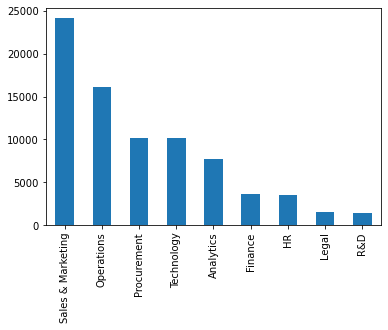

In [68]:
data['department'].value_counts().plot(kind='bar')

<AxesSubplot:>

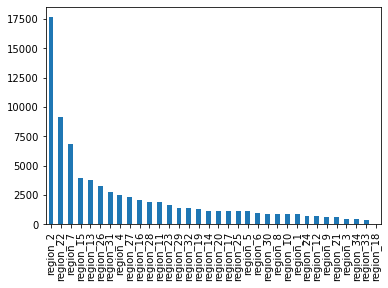

In [69]:
data['region'].value_counts().plot(kind='bar')

<AxesSubplot:>

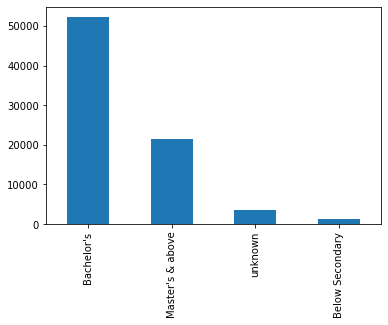

In [48]:
data['education'].value_counts().plot(kind='bar')

<AxesSubplot:>

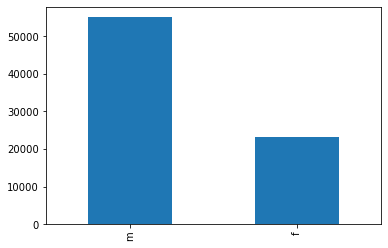

In [49]:
data['gender'].value_counts().plot(kind='bar')

<AxesSubplot:>

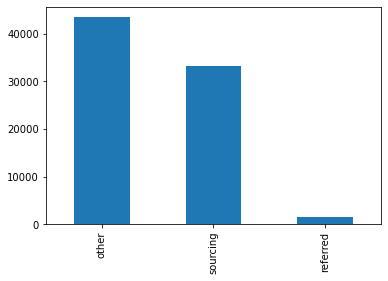

In [50]:
data['recruitment_channel'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

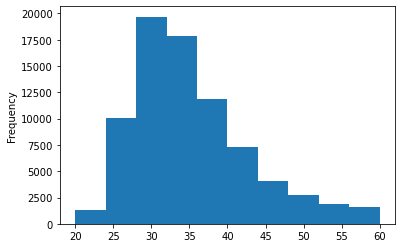

In [51]:
data['age'].plot(kind='hist')

In [52]:
data['age'].describe()

count    78298.000000
mean        34.797619
std          7.665928
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64

<AxesSubplot:>

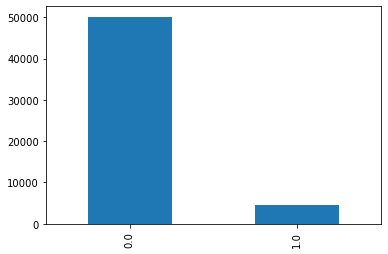

In [53]:
data['is_promoted'].value_counts().plot(kind='bar')

###  bivariate analysis

<AxesSubplot:xlabel='is_promoted'>

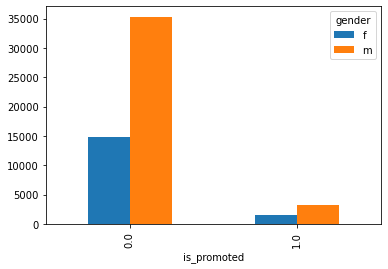

In [54]:
pd.crosstab(data['is_promoted'], data['gender']).plot(kind='bar')

<AxesSubplot:xlabel='is_promoted'>

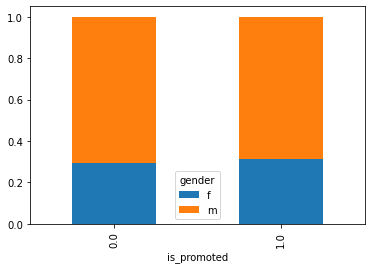

In [55]:
gender = pd.crosstab(data['is_promoted'], data['gender'])
gender.div(gender.sum(1),axis=0).plot(kind='bar', stacked =True)

In [56]:
def bivariate_percent_plt(x,y):
    cross= pd.crosstab(x,y)
    cross.div(cross.sum(1),axis=0).plot(kind='bar', stacked =True)

In [57]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'gemder'],
      dtype='object')

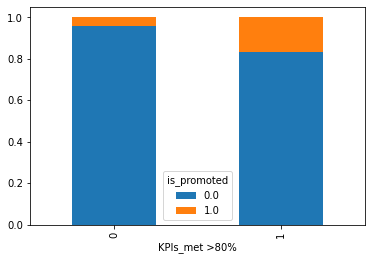

In [58]:
bivariate_percent_plt(data['KPIs_met >80%'], data['is_promoted'])

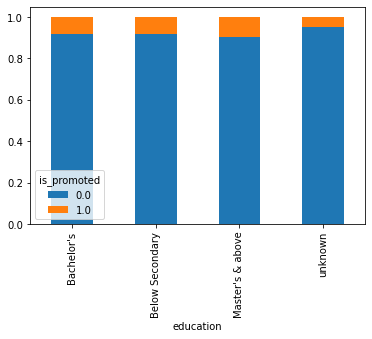

In [59]:
bivariate_percent_plt(data['education'], data['is_promoted'])

In [60]:
data.drop(columns=['employee_id']).corr()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,gemder
no_of_trainings,1.000000,-0.082536,-0.062046,-0.058403,-0.043912,-0.004818,0.044180,-0.024896,0.084530
age,-0.082536,1.000000,0.181352,0.653339,-0.026223,-0.007357,-0.044592,-0.017166,-0.017816
previous_year_rating,-0.062046,0.181352,1.000000,0.193161,0.273625,0.021647,0.055040,0.125991,-0.024587
length_of_service,-0.058403,0.653339,0.193161,1.000000,-0.077854,-0.040556,-0.035272,-0.010670,-0.017800
KPIs_met >80%,-0.043912,-0.026223,0.273625,-0.077854,1.000000,0.100365,0.076729,0.221582,-0.037916
awards_won?,-0.004818,-0.007357,0.021647,-0.040556,0.100365,1.000000,0.072655,0.195871,0.000553
avg_training_score,0.044180,-0.044592,0.055040,-0.035272,0.076729,0.072655,1.000000,0.181147,-0.024840
is_promoted,-0.024896,-0.017166,0.125991,-0.010670,0.221582,0.195871,0.181147,1.000000,-0.011109
gemder,0.084530,-0.017816,-0.024587,-0.017800,-0.037916,0.000553,-0.024840,-0.011109,1.000000


In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

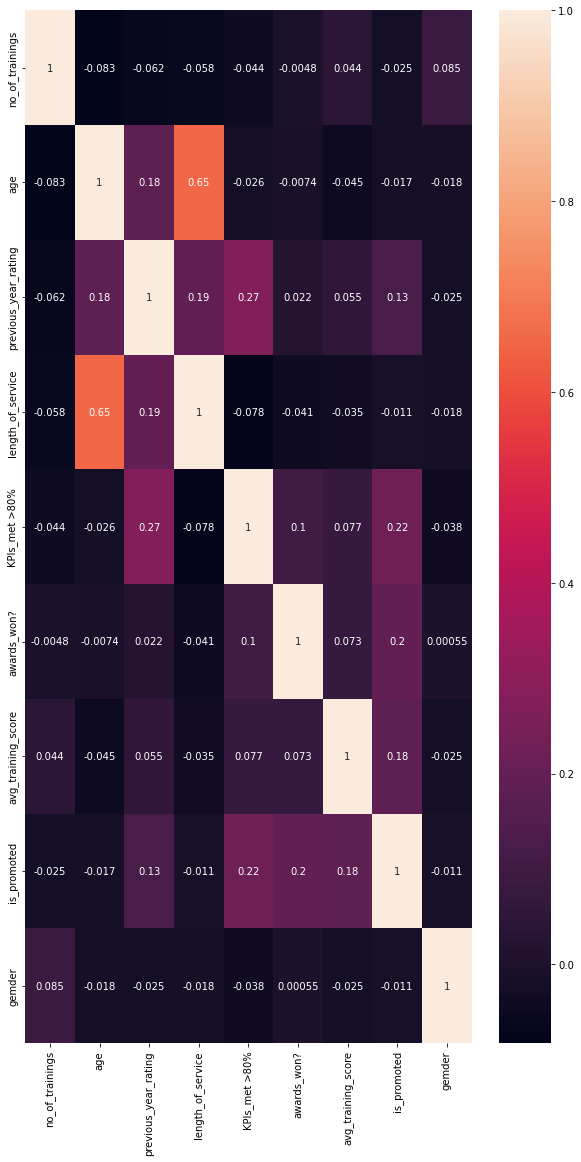

In [62]:
plt.figure(figsize=(10,19))
sns.heatmap(data.drop(columns=['employee_id']).corr(), annot=True )

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
mmsc = MinMaxScaler()
scaled_data = mmsc.fit_transform(encoded_Data[['no_of_trainings', 'age', 'previous_year_rating','length_of_service', 'KPIs_met >80%', 'awards_won?','avg_training_score']])
scaled_data = pd.DataFrame(scaled_data,columns=['no_of_trainings', 'age','previous_year_rating','length_of_service', 'KPIs_met >80%', 'awards_won?','avg_training_score'])       
print(scaled_data.shape)

(78298, 7)


In [65]:
preprocessed_data = pd.concat([scaled_data,encoded_Data.drop(columns=['no_of_trainings', 'age', 'previous_year_rating','length_of_service', 'KPIs_met >80%', 'awards_won?','avg_training_score'])])

In [66]:
preprc_train = preprocessed_data[preprocessed_data['is_promoted'].notna()]
preprc_test = preprocessed_data[preprocessed_data['is_promoted'].isna()]

In [67]:
prepocessed_data.to_csv('preprc_train.csv', index=False)

NameError: name 'prepocessed_data' is not defined

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
prepc =pd.read_csv('preprc_train.csv')

In [ ]:
x = prepc.drop(columns=['employee_id','is_promoted'])
y = prepc['is_promoted']

In [ ]:
train_x, test_x, train_y , test_y = train_test_split(x,y,test_size=0.2)